In [8]:
# 추세 분석
# https://dschloe.github.io/python/python_edu/07_deeplearning/deep_learning_lstm/
# 군집분석
# https://suy379.tistory.com/m/51

# 들어가기 전에..
- 해법수학과 미래엔수학은 어떤 이유를 가지고 점포 생성을 위한 지역 선정을 했을까?
- 지점수가 많은곳은 장사가 잘 되는 것으로 가정
- 지역선정에 가장 큰 영향을 미치는 요인을 알아보자

# 군집분석
- 군집별(지역별) 지점수에 미치는 요인 알아보기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
df = pd.read_csv('./data/통합데이터.csv')

In [188]:
df

,지역,지점수(미래엔),지점수(해법),1인당 개인소득(천원),초등생_사교육지출(만원)
0,경기,378,861,21937,34.6
1,서울,111,386,25256,47.3
2,경남,88,159,20650,24.9
3,인천,69,112,21317,29.8
4,부산,60,155,21352,32.8
5,충남,57,67,21262,23.3
6,대구,55,85,21046,37.4
7,경북,45,123,20667,26.4
8,전남,41,55,20881,22.4
9,전북,35,59,20862,23.9


In [189]:
df.isnull().sum()

지역               0
지점수(미래엔)         0
지점수(해법)          0
1인당 개인소득(천원)     0
초등생_사교육지출(만원)    0
dtype: int64

In [109]:
# k-means 클러스터링 실시
# <조건>
# 1. 그룹 개수 설정: 3개
# 2. 1인당 개인소득(천원)과 초등생_사교육지출(만원) 변수는 지점수 변수에 비해 값이 너무 크므로 모든 변수 표준화 작업 실시

In [190]:
use_df = df.drop(columns={'지역'})

In [191]:
use_df

,지점수(미래엔),지점수(해법),1인당 개인소득(천원),초등생_사교육지출(만원)
0,378,861,21937,34.6
1,111,386,25256,47.3
2,88,159,20650,24.9
3,69,112,21317,29.8
4,60,155,21352,32.8
5,57,67,21262,23.3
6,55,85,21046,37.4
7,45,123,20667,26.4
8,41,55,20881,22.4
9,35,59,20862,23.9


In [192]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#표준화
sc = StandardScaler()
df_scaled = sc.fit_transform(use_df)
pd.DataFrame(df_scaled) #시도별 제외 5개의 변수가 표준화됨.

,0,1,2,3
0,3.766545,3.617562,0.112785,0.807196
1,0.585237,1.250508,2.489958,2.867168
2,0.311192,0.119305,-0.809005,-0.766168
3,0.084807,-0.114908,-0.331278,0.028624
4,-0.022428,0.099372,-0.306210,0.515232
5,-0.058173,-0.339156,-0.370671,-1.025692
6,-0.082003,-0.249457,-0.525377,1.261363
7,-0.201153,-0.060092,-0.796829,-0.522865
8,-0.248813,-0.398955,-0.643555,-1.171675
9,-0.320303,-0.379022,-0.657164,-0.928371


In [193]:
#cc_scaled 데이터를 넣어 클러스터링
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(df_scaled)

#클러스터링 변수인 clusters 값을 원본 데이터인 'cc'내에 넣기 
df['cluster'] = clusters.labels_
df

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,지역,지점수(미래엔),지점수(해법),1인당 개인소득(천원),초등생_사교육지출(만원),cluster
0,경기,378,861,21937,34.6,3
1,서울,111,386,25256,47.3,1
2,경남,88,159,20650,24.9,0
3,인천,69,112,21317,29.8,0
4,부산,60,155,21352,32.8,2
5,충남,57,67,21262,23.3,0
6,대구,55,85,21046,37.4,2
7,경북,45,123,20667,26.4,0
8,전남,41,55,20881,22.4,0
9,전북,35,59,20862,23.9,0


## 클러스터링 결과 분석

In [194]:
#cluster를 기준으로 데이터 개수 세기
df.groupby('cluster').count()

,지역,지점수(미래엔),지점수(해법),1인당 개인소득(천원),초등생_사교육지출(만원)
cluster,,,,,
0,9,9,9,9,9
1,1,1,1,1,1
2,6,6,6,6,6
3,1,1,1,1,1


In [195]:
#그룹별 특징을 알아보자! -그룹별 평균값
df.groupby('cluster').mean()

C:\Users\leah5\AppData\Local\Temp\ipykernel_4428\1757719743.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,지점수(미래엔),지점수(해법),1인당 개인소득(천원),초등생_사교육지출(만원)
cluster,,,,
0,44.222222,76.333333,20914.777778,25.577778
1,111.000000,386.000000,25256.000000,47.300000
2,27.500000,60.333333,22471.000000,31.916667
3,378.000000,861.000000,21937.000000,34.600000


In [196]:
df[df['cluster']==0]['지역']

2     경남
3     인천
5     충남
7     경북
8     전남
9     전북
10    충북
11    제주
15    강원
Name: 지역, dtype: object

In [197]:
df[df['cluster']==1]['지역']

1    서울
Name: 지역, dtype: object

In [198]:
df[df['cluster']==2]['지역']

4     부산
6     대구
12    대전
13    울산
14    광주
16    세종
Name: 지역, dtype: object

In [199]:
df[df['cluster']==3]['지역']

0    경기
Name: 지역, dtype: object

In [200]:
df.groupby('cluster').mean()

C:\Users\leah5\AppData\Local\Temp\ipykernel_4428\4109590744.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,지점수(미래엔),지점수(해법),1인당 개인소득(천원),초등생_사교육지출(만원)
cluster,,,,
0,44.222222,76.333333,20914.777778,25.577778
1,111.000000,386.000000,25256.000000,47.300000
2,27.500000,60.333333,22471.000000,31.916667
3,378.000000,861.000000,21937.000000,34.600000


- 분류0 = 경남 충남 경북 전남 전북 충북 제주 강원 -> 지방권
- 분류1 = 서울
- 분류2 = 인천 부산 대구 대전 울산 광주 세종 -> 광역시
- 분류3 = 경기
- 결과 해석:
    - 지점수 순위: 경기 > 서울 > 지방권 > 광역시
    - 1인당 개인소득 순위: 서울 > 광역시 > 경기 > 지방권
    - 사교육지출 순위: 서울 > 경기 > 광역시 > 지방권
- 사교육지출이 지점 지역 선정에 중요한 요인인 것을 알 수 있다.
- 앞으로 지역 선정이 되어야하는 곳은 지점수가 별로 없는 곳(블루오션)이면서 사교육지출 수치 예측이 높은 곳으로 선정해야한다.

## 해석 시각화

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
# -' 깨짐 해결'
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
from scipy import stats
# 한글 깨짐 해결
plt.rc('font', family='Malgun Gothic')

In [202]:
# 점포수

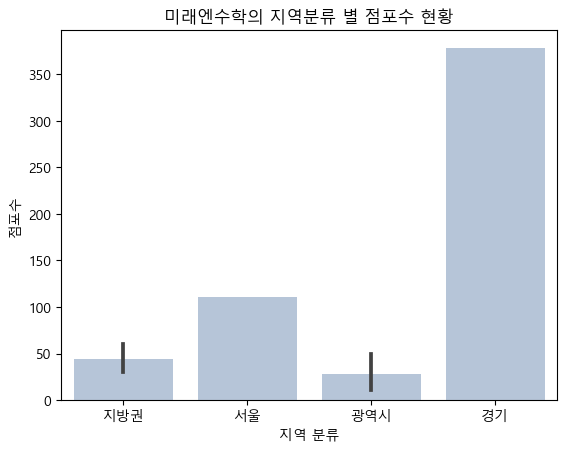

In [213]:
sns.barplot(data=df, x='cluster', y='지점수(미래엔)', color='#B0C4DE')
plt.xticks(ticks = [0, 1, 2, 3], labels=['지방권','서울','광역시','경기'])
plt.xlabel('지역 분류')
plt.ylabel('점포수')
plt.title('미래엔수학의 지역분류 별 점포수 현황')
plt.show()

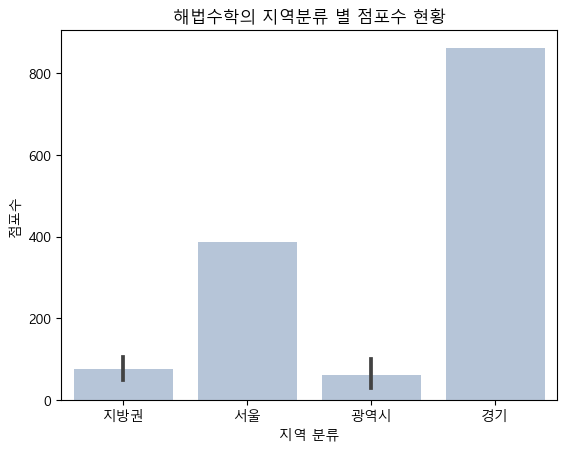

In [214]:
sns.barplot(data=df, x='cluster', y='지점수(해법)', color='#B0C4DE')
plt.xticks(ticks = [0, 1, 2, 3], labels=['지방권','서울','광역시','경기'])
plt.xlabel('지역 분류')
plt.ylabel('점포수')
plt.title('해법수학의 지역분류 별 점포수 현황')
plt.show()

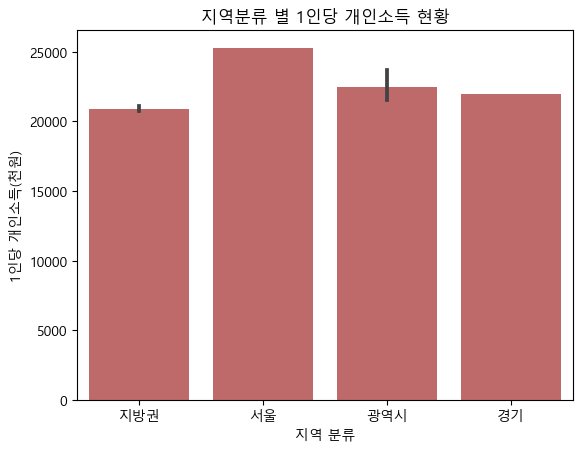

In [215]:
# 1인당 개인소득 순위
sns.barplot(data=df, x='cluster', y='1인당 개인소득(천원)', color='#CD5C5C')
plt.xticks(ticks = [0, 1, 2, 3], labels=['지방권','서울','광역시','경기'])
plt.xlabel('지역 분류')
plt.ylabel('1인당 개인소득(천원)')
plt.title('지역분류 별 1인당 개인소득 현황')
plt.show()

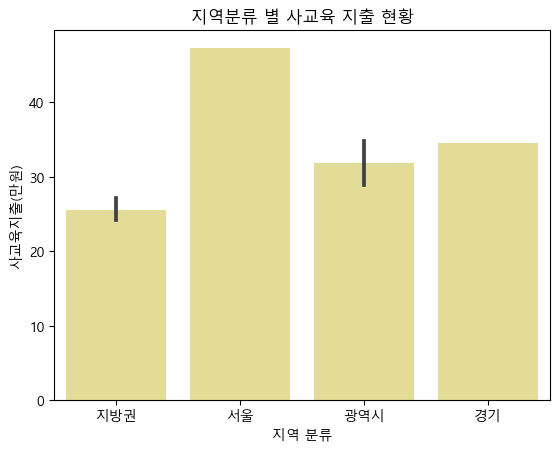

In [216]:
# 사교육지출 순위
sns.barplot(data=df, x='cluster', y='초등생_사교육지출(만원)', color='#F0E68C')
plt.xticks(ticks = [0, 1, 2, 3], labels=['지방권','서울','광역시','경기'])
plt.xlabel('지역 분류')
plt.ylabel('사교육지출(만원)')
plt.title('지역분류 별 사교육 지출 현황')
plt.show()

In [208]:
# # 초등학교 수 비교
# sns.barplot(data=df, x='cluster', y='초등학교수', color='#2E8B57')
# plt.xticks(ticks = [0, 1, 2, 3], labels=['서울','지방권','경기','광역시'])
# plt.xlabel('지역 분류')
# plt.ylabel('초등학교수')
# plt.title('지역분류 별 초등학교수 현황')
# plt.show()

In [209]:
# # 공시가격 비교
# sns.barplot(data=df, x='cluster', y='공시가격비율', color='#6495ED')
# plt.xticks(ticks = [0, 1, 2, 3], labels=['서울','지방권','경기','광역시'])
# plt.xlabel('지역 분류')
# plt.ylabel('공시가격비율')
# plt.title('지역분류 별 공시가격 현황')
# plt.show()

## 클러스터링 결과 시각화 (차원 축소 활용)
- pca 주성분분석

In [210]:
from sklearn.decomposition import PCA
X = df_scaled.copy()

#객체
pca = PCA(n_components=2)

#적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[ 4.74513078e+00, -2.27742822e+00],
       [ 3.18216917e+00,  2.46243694e+00],
       [-3.52893364e-01, -1.10066907e+00],
       [-1.08165765e-01, -2.23736198e-01],
       [ 1.96650095e-01, -8.46924717e-04],
       [-8.30524555e-01, -6.08752894e-01],
       [ 2.33700906e-01,  3.20945127e-01],
       [-6.34651849e-01, -7.04299754e-01],
       [-1.12519013e+00, -7.70303996e-01],
       [-1.04383095e+00, -6.42959138e-01],
       [-7.43763531e-01, -2.00637046e-01],
       [-1.13337720e+00, -4.58556984e-01],
       [-6.18185098e-02,  1.20357565e+00],
       [-1.63012331e-01,  1.92498303e+00],
       [-5.99065006e-01,  5.57840414e-01],
       [-1.14131092e+00, -3.66149859e-01],
       [-4.20046835e-01,  8.84558915e-01]])

In [211]:
#x_pca를 보기 쉽게 데이터프레임으로 만들기
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = df['cluster'] 
pca_df

,0,1,cluster
0,4.745131,-2.277428,3
1,3.182169,2.462437,1
2,-0.352893,-1.100669,0
3,-0.108166,-0.223736,0
4,0.196650,-0.000847,2
5,-0.830525,-0.608753,0
6,0.233701,0.320945,2
7,-0.634652,-0.704300,0
8,-1.125190,-0.770304,0
9,-1.043831,-0.642959,0


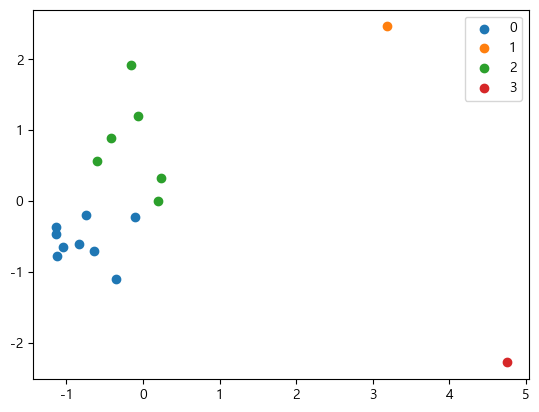

In [212]:
for i in sorted(pca_df['cluster'].unique()):
    tmp = pca_df.loc[pca_df['cluster'] == i] #해당하는 클러스터 번호일 때 그림을 그리고, for문 실행하며 위에 덧그림 
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(pca_df['cluster'].unique()))

## 사교육지출, 지점수 상관관계 분석
- 미래엔의 지점수, 해법수학의 지점수, 사교육지출 이 세가지 변수가 정말 연관이 있을까?

## 네가지 분류의 사교육 지출과 지점수 사이의 차이 알아보기

In [217]:
# 초등학교, 지점수 상관관계 분석
# p < 0.05 이므로 정규성을 불만족한다.
from scipy import stats
stats.shapiro(df['초등생_사교육지출(만원)'])

ShapiroResult(statistic=0.8772074580192566, pvalue=0.028658227995038033)

In [218]:
stats.shapiro(df['지점수(미래엔)'])

ShapiroResult(statistic=0.5702352523803711, pvalue=5.436605533759575e-06)

In [136]:
stats.shapiro(df['지점수(해법)'])

ShapiroResult(statistic=0.5637425184249878, pvalue=4.734903541248059e-06)

In [234]:
# 상관관계 분석 - 스피어만 상관계수
# p < 0.05, 두 변수 사이에 상관관계가 있다.
stats.spearmanr(df['지점수(미래엔)'], df['지점수(해법)'])

SignificanceResult(statistic=0.9135501410535354, pvalue=3.023568444562827e-07)

In [235]:
# p > 0.05, 두 변수 사이에 상관관계가 없다.
stats.spearmanr(df['초등생_사교육지출(만원)'], df['지점수(해법)'])

SignificanceResult(statistic=0.22058823529411767, pvalue=0.3948890883363402)

In [236]:
# p > 0.05, 두 변수 사이에 상관관계가 없다.
stats.spearmanr(df['초등생_사교육지출(만원)'], df['지점수(미래엔)'])

SignificanceResult(statistic=0.22808097481336587, pvalue=0.3786102977636938)

- 해석: 상관관계 분석을 한 결과, 지점수(미래앤,해법)간의 연관은 있으나, 사교육지출과 지점수 간의 연관은 없는 것으로 나온다.

In [237]:
import plotly.express as px
# 그래프 그리기
fig = px.scatter_3d(df, x='초등생_사교육지출(만원)', y='지점수(미래엔)', z='지점수(해법)', color=df.지역, width=640, height=480)
fig.show()